In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from models.model import Model
from datetime import datetime
from utils import get_device, transform_data_to_numpy, printSampleImages
from torchsummary import summary
import os
from tqdm import tqdm
from torch.utils.data import Subset
import time
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'albumentations'

In [51]:
dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transforms.ToTensor())
exp_data = torch.tensor(dataset.data) / 255.0  # Convert to tensor and normalize
print('[Train]')

mean = exp_data.mean(axis = (0,1,2)) # torch.mean(exp_data, (0,1,2))
std = exp_data.std(axis = (0,1,2)) # torch.std(exp_data, (0,1,2))
print(' - Numpy Shape:', exp_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp_data.size())
print(' - min:', exp_data.min())
print(' - max:', exp_data.max())
print(' - mean by channel:', mean)
print(' - std by channel:', std)
print(' - mean (overall):', exp_data.mean())
print(' - std (overall):', exp_data.std())
print(' - var:', torch.var(exp_data, (0,1,2)))


Files already downloaded and verified
[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean by channel: tensor([0.4914, 0.4822, 0.4465])
 - std by channel: tensor([0.2470, 0.2435, 0.2616])
 - mean (overall): tensor(0.4734)
 - std (overall): tensor(0.2516)
 - var: tensor([0.0610, 0.0593, 0.0684])


torch.Size([3, 32, 32])


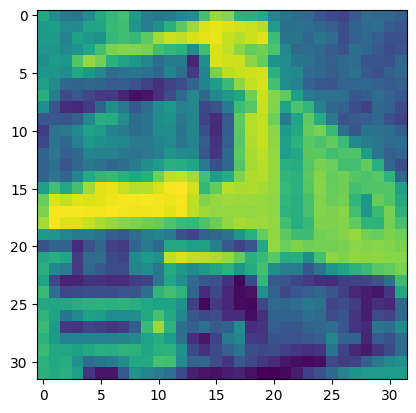

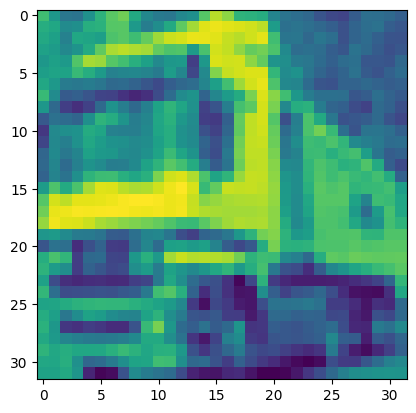

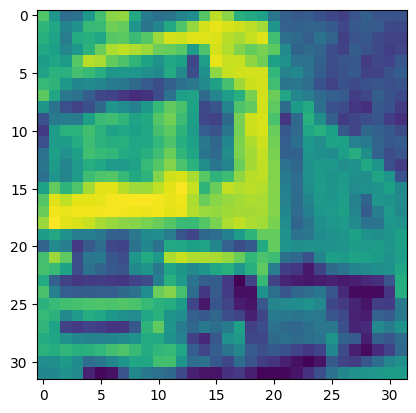

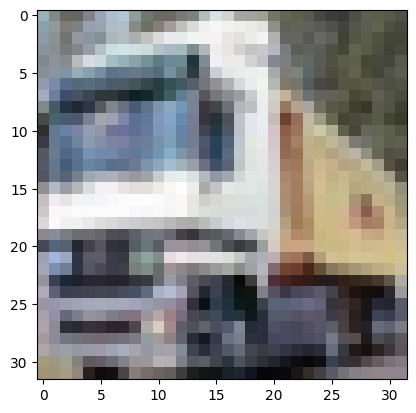

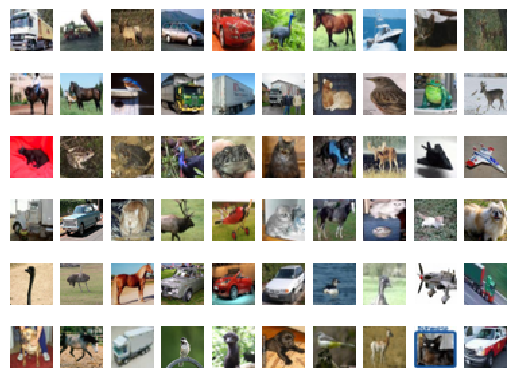

In [49]:
from utils import get_device, transform_data_to_numpy, printSampleImages

# Examing Data
iter_data = iter(dataset)
image, label = next(iter_data)
image, label = next(iter_data)
print(image.shape)
figure = plt.figure()
# figure.set_size_inches(2, 2)
plt.imshow(image[0].numpy().squeeze())
plt.figure()
plt.imshow(image[1].numpy().squeeze())
plt.figure()
plt.imshow(image[2].numpy().squeeze())
plt.figure()
# plt.imshow(transforms.ToPILImage(image))
plt.imshow(np.transpose(image, (1, 2, 0)), interpolation='nearest')


figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    image, label = dataset[index]
    plt.subplot(6, 10, index)
    plt.axis('off')
    # plt.imshow(image[0].numpy().squeeze(), cmap='gray_r')
    plt.imshow(np.transpose(image, (1, 2, 0)), interpolation='nearest')